In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 6'

In [4]:
df_team_recruit = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit_state.pkl'))

In [5]:
df_team = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'merge team total.csv'), index_col = False)

In [6]:
df_team_recruit.columns

Index(['primary_key', 'freshman_year', 'name', 'position', 'high_school',
       'rating', 'stars', 'committed_to', 'recruit_type', 'height', 'weight',
       'high_school_city', 'high_school_state', 'high_school_country', 'id',
       'athlete_id', 'ncaa_year', 'ncaa_team', 'conference', 'total_games',
       'win', 'loss', 'off_rank', 'def_rank', 'star_ranking', 'star_position',
       'ncaa_team_state'],
      dtype='object')

In [7]:
df_t_r = df_team_recruit[['freshman_year', 'position', 'high_school', 'rating', 'stars', 'height', 'weight', 'high_school_city', 'high_school_state', 'ncaa_year',
                          'ncaa_team', 'conference', 'total_games', 'win', 'loss', 'off_rank', 'def_rank', 'star_ranking', 'star_position', 'ncaa_team_state']]
                          

In [8]:
df_t_r.head()

,freshman_year,position,high_school,rating,stars,height,weight,high_school_city,high_school_state,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank,star_ranking,star_position,ncaa_team_state
0,2018,OLB,Cy-Fair,0.7953,2,73,210,Cypress,TX,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_OLB,CO
1,2018,WR,Shadow Creek,0.8065,3,69,165,Pearland,TX,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_WR,CO
2,2018,S,Alief Hastings,0.8054,3,73,205,Houston,TX,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_S,CO
3,2018,DUAL,Damien,0.7792,2,74,190,La Verne,CA,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_DUAL,CO
4,2018,TE,San Clemente,0.8255,3,77,213,San Clemente,CA,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_TE,CO


In [10]:
df_t_r.describe()

,freshman_year,rating,stars,ncaa_year,total_games,win,loss,off_rank,def_rank
count,13003.000000,13003.000000,13003.000000,13003.000000,13003.000000,13003.000000,13003.000000,13003.000000,13003.000000
mean,2019.784127,0.846502,3.016458,2019.784127,11.819426,6.345305,5.474121,64.446974,63.485965
std,1.371111,0.048999,0.584136,1.371111,2.244308,3.201407,2.561053,37.304635,37.668206
min,2018.000000,0.699600,1.000000,2018.000000,3.000000,0.000000,0.000000,1.000000,1.000000
25%,2019.000000,0.812500,3.000000,2019.000000,12.000000,4.000000,4.000000,32.500000,30.000000
50%,2020.000000,0.844200,3.000000,2020.000000,12.000000,6.000000,6.000000,64.000000,63.000000
75%,2021.000000,0.871900,3.000000,2021.000000,13.000000,9.000000,7.000000,97.000000,96.000000
max,2022.000000,0.999900,5.000000,2022.000000,15.000000,15.000000,12.000000,131.000000,131.000000


C:\Users\justi\AppData\Local\Temp\ipykernel_20828\3639647463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t_r['rating'])


<Axes: xlabel='rating', ylabel='Density'>

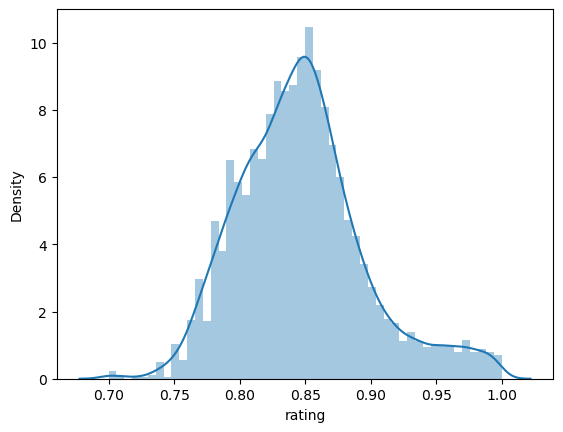

In [16]:
sns.distplot(df_t_r['rating'])

In [17]:
year_avg = df_t_r.groupby(['freshman_year'])['rating'].mean()

In [18]:
year_avg

freshman_year
2018    0.836323
2019    0.841749
2020    0.845268
2021    0.851709
2022    0.865191
Name: rating, dtype: float64

In [28]:
year_conf = df_t_r.groupby(['ncaa_year', 'conference']).agg({
    'win' : 'count',
    'rating' : 'mean'
})

In [29]:
year_conf.head(55)

win    rating
ncaa_year conference                    
2018      AAC              279  0.818269
          ACC              313  0.867750
          Big 12           243  0.865491
          Big Ten          347  0.863843
          C-USA            298  0.803728
          FBS Independent  137  0.810725
          MAC              240  0.800382
          MWC              295  0.797177
          Pac-12           290  0.860791
          SEC              330  0.881733
          Sun Belt         244  0.794831
2019      AAC              224  0.822677
          ACC              301  0.864579
          Big 12           226  0.865319
          Big Ten          305  0.874287
          C-USA            331  0.809693
          FBS Independent  124  0.823187
          MAC              277  0.802231
          Mountain West    274  0.807161
          Pac-12           294  0.861439
          SEC              353  0.895916
          Sun Belt         230  0.800771
2020      AAC              243  0.824789
          ACC              319  0.869026
          Big 12           221  0.864120
          Big Ten          318  0.868397
          C-USA            272  0.818586
          FBS Independent  130  0.806338
          MAC              276  0.809271
          Mountain West    235  0.811261
          Pac-12           283  0.860941
          SEC              338  0.895361
          Sun Belt         190  0.817656
2021      AAC              189  0.836043
          ACC              294  0.869330
          Big 12           171  0.870661
          Big Ten          260  0.877562
          C-USA            163  0.822501
          FBS Independent  131  0.825650
          MAC              234  0.813211
          Mountain West    222  0.818199
          Pac-12           212  0.871464
          SEC              277  0.894123
          Sun Belt         129  0.824612
2022      AAC              132  0.849690
          ACC              233  0.875857
          Big 12           185  0.882156
          Big Ten          282  0.881555
          C-USA             90  0.826934
          FBS Independent   80  0.852301
          MAC              147  0.822345
          Mountain West    144  0.828978
          Pac-12           191  0.872435
          SEC              313  0.901135
          Sun Belt         144  0.831585

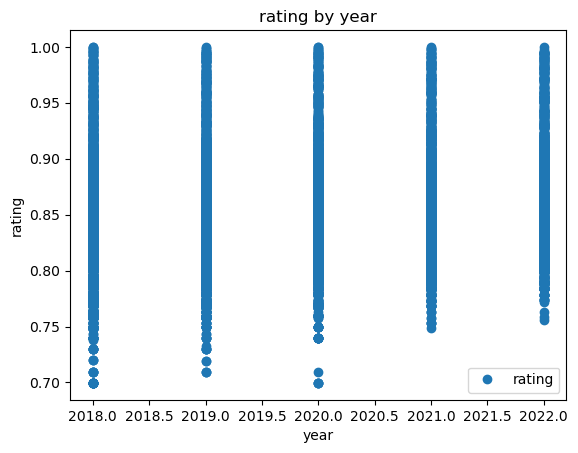

In [30]:
df_t_r.plot(x = 'ncaa_year', y='rating',style='o')
plt.title('rating by year')  
plt.xlabel('year')  
plt.ylabel('rating')  
plt.show()

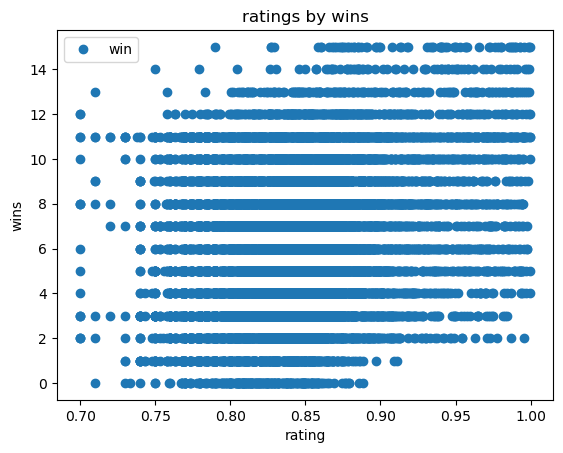

In [32]:
df_t_r.plot(x = 'rating', y='win',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ratings by wins')  
plt.xlabel('rating')  
plt.ylabel('wins')  
plt.show()

## Hypotheses: As the years increase so will the recruiting rankings.

In [45]:
x = df_t_r['ncaa_year'].values.reshape(-1, 1)
y = df_t_r['rating'].values.reshape(-1, 1)

In [46]:
x

array([[2018],
       [2018],
       [2018],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [47]:
y

array([[0.7953],
       [0.8065],
       [0.8054],
       ...,
       [0.7983],
       [0.8117],
       [0.8206]])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
regression = LinearRegression()

In [50]:
regression.fit(x_train, y_train)

LinearRegression()

In [51]:
y_predicted = regression.predict(x_test)

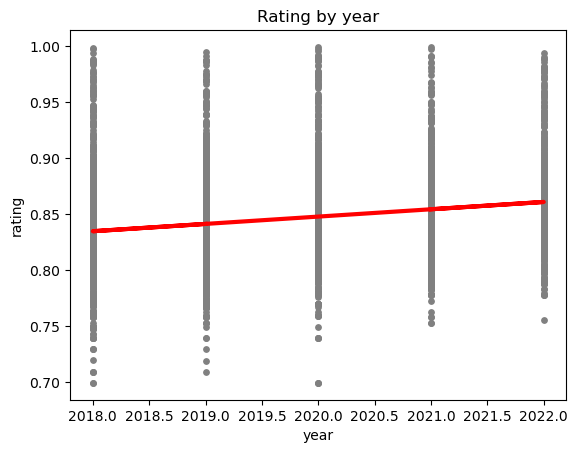

In [52]:
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating by year')
plot_test.xlabel('year')
plot_test.ylabel('rating')
plot_test.show()

In [53]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00653067]]
Mean squared error:  0.002242166332399361
R2 score:  0.03447005545930126


In [55]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.8735,0.841479
1,0.8499,0.841479
2,0.9877,0.841479
3,0.8234,0.841479
4,0.8204,0.834948
5,0.8464,0.854540
6,0.7583,0.834948
7,0.8748,0.861071
8,0.8089,0.861071
9,0.8269,0.834948


## This model did not perform very well on this test as R2 score was .03 away from the actual rating score on average. While this may not seem like a lot it could mean a recruit is more than 100 spots from their actual ranking.